In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


**README:**

This script is intended to clean the data for Commercial Analysis project. 

Input: Raw country data excel/csv
Output: Cleaned excel to be used in tableau
 

How to use this file? Follow below steps

* In **line 3** input country you are interested to do analysis
* In **line 4** change target path to the folder where you want to dump excel
* In **line 5** change path to excel file of country that you want to clean
* You are set! Run the script










## **READING DATASET**

In [3]:
country = input("Input the country to dump excel ") # Input the country

Input the country to dump excel USA


In [4]:
target_path = '/content/drive/MyDrive/Capstone_TEAM7_Fall_2022/Project_Files/' # target path where you want to dump the clean excel

In [5]:

# Input the data file
df = pd.read_csv('/content/drive/MyDrive/Capstone_TEAM7_Fall_2022/listings_US.csv')

In [6]:
df.head(2)

,id,listing_url,scrape_id,last_searched,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name,reviews_per_month
0,35575312,https://www.airbnb.com/rooms/35575312,20220717002814,2022-07-17,2022-07-22,WV Mountain cottage minutes from New River Gorge,"Located on Green Acres campground, just .2 mil...",Rural community. Quaint nearby towns and growi...,https://a0.muscache.com/pictures/f0ee66c4-9091...,60091041,...,7,0,0,19,Fayette,54,West Virginia,NaN,NaN,1.33
1,635519741001985764,https://www.airbnb.com/rooms/635519741001985764,20220717002814,2022-07-17,2022-07-20,Ptarmigan Ranch North Fork Views!,Welcome to Ptarmigan Ranch! This beautiful thr...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,80717299,...,78,1,0,29,Park,56,Wyoming,NaN,NaN,NaN


## **NULL VALUE EXPLORATION**

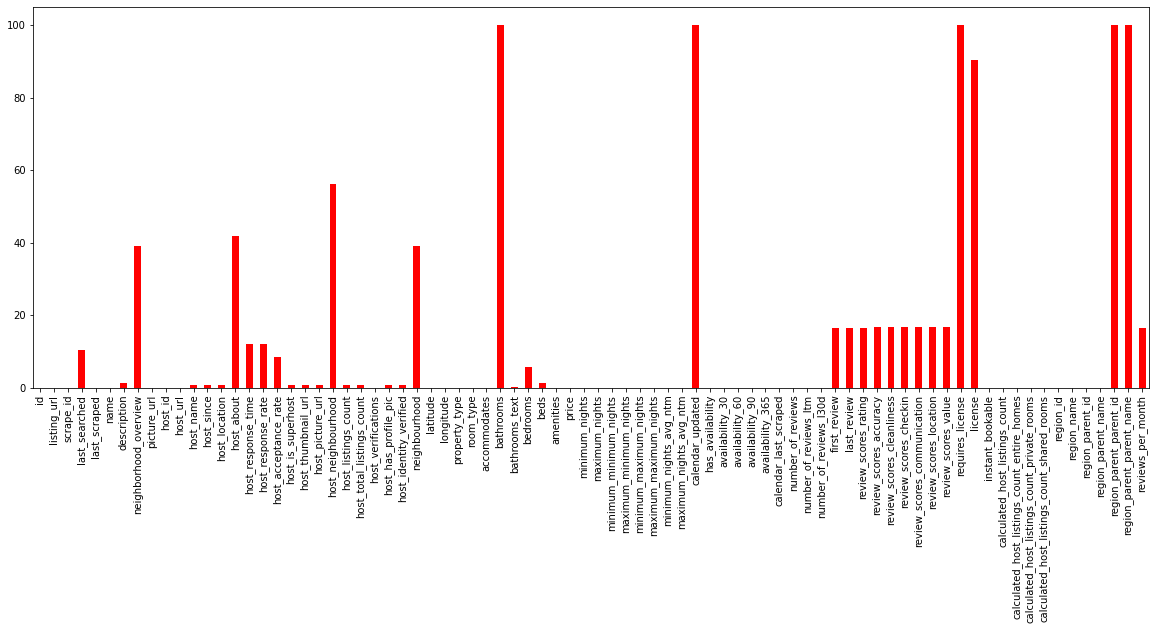

In [7]:
# Explore the missing values
plt.figure(figsize=(20,7))
null = df.isnull().sum()*100/df.shape[0]
null.plot(kind='bar',color='r')

## **IRRELEVANT COLUMNS FOR ANALYSIS**

Exclude the missing features which are not relevant for the analysis

In [8]:
cols_drop_list1 = ['neighborhood_overview','bathrooms','calendar_updated','requires_license','region_parent_parent_id','region_parent_parent_name','host_about']
cols_drop_list2 = ['listing_url','scrape_id','picture_url','host_url','host_url','host_thumbnail_url','host_picture_url','first_review','last_review','host_neighbourhood','host_total_listings_count']

df.drop(cols_drop_list1+cols_drop_list2,axis=1,inplace=True) # DROPPED  18 COLS

In [9]:
cols_drop_list3 = ['name','description','amenities']
df.drop(cols_drop_list3,axis=1,inplace=True)

### **PROCESSING PRICE**

Converting price data to numeric data to avoid strings and special characters

In [10]:
df['price'] = pd.to_numeric(df['price'].str.replace('$','').str.replace(',','').str.split(".", n = 1, expand = True)[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


##  **HOST ACTIVITY TYPE**

Converting host acceptance and response rate to avoid strings and special characters

In [11]:
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'].str.replace('%',''),errors='coerce')

df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%',''),errors='coerce')



## **MIN/MAX NIGHTS**

Correlation Analysis to remove irrelevant features in minimum & maximum nights

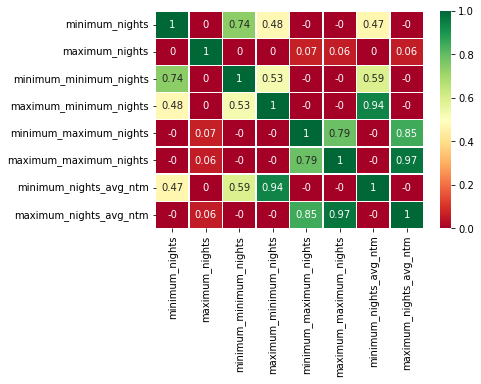

In [12]:
df3 = df[['minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']]

sns.heatmap(round(df3.corr(),2),annot=True,cmap='RdYlGn',linewidths=0.30)

In [13]:
cols_drop_list5 = ['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm'] # Dropped these dude to high correlation

df.drop(cols_drop_list5,axis=1,inplace=True)

### **HAS AVAILABILITY (deleted)**

In [14]:
df.drop('has_availability',axis=1,inplace=True) # No values

### **AVAILABILITY**

Correlation Analysis to remove irrelevant features in availability 30/60/90/365

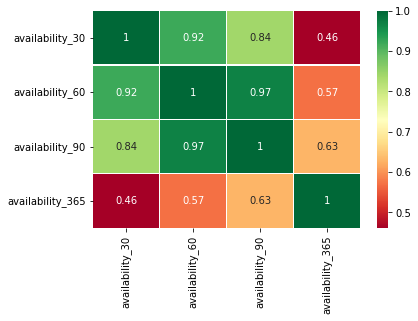

In [15]:
df4 = df[['availability_30','availability_60','availability_90','availability_365']]

sns.heatmap(round(df4.corr(),2),annot=True,cmap='RdYlGn',linewidths=0.30)

In [16]:
df.drop(['availability_30','availability_60','availability_90','availability_365'],axis=1, inplace=True) # High correlations

In [17]:
df.drop(['calendar_last_scraped','number_of_reviews', 'number_of_reviews_l30d','review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],inplace=True,axis=1) # Reducing complexity by dropping as these variables are not required for analysis

In [18]:
df.drop(['instant_bookable','region_id','region_parent_id'],axis=1,inplace=True) # IDs are not required and dropping these variables as these are not required for analysis.

## **METRICS COMPUTATION**

In [19]:
# STR vs LTR calculation
metric_2_str_ltr = np.where(df['minimum_nights'] < 30,'STR','LTR')
df['STR_LTR'] = metric_2_str_ltr

In [20]:
# Multi vs Single listing calculation
listing_type = np.where(df['calculated_host_listings_count'] > 1 , 'Multi','Single')
df['listing_type'] = listing_type




In [21]:
# Revenue feature computation

REVIEW_RATE = 0.5
MAXIMUM_OCCUPANCY = 255
AVERAGE_NIGHTS_STAY = 3
estimated_bookings_ltm = round(df.number_of_reviews_ltm /REVIEW_RATE)

estimated_nights_ltm = np.where((estimated_bookings_ltm*np.where(df.minimum_nights > AVERAGE_NIGHTS_STAY,df.minimum_nights,AVERAGE_NIGHTS_STAY)) > MAXIMUM_OCCUPANCY, MAXIMUM_OCCUPANCY,(estimated_bookings_ltm*np.where(df.minimum_nights > AVERAGE_NIGHTS_STAY,df.minimum_nights,AVERAGE_NIGHTS_STAY)))


estimated_revenue_ltm = round(estimated_nights_ltm * df.price)



In [22]:
df['Revenue'] = estimated_revenue_ltm

In [23]:
# Occupancy field computation

METRIC_5_occupancy = np.where(estimated_nights_ltm < 30, 'Occasionally rented', 
         (np.where(((estimated_nights_ltm > 30) & (estimated_nights_ltm <= 90)), 'Semi regularly rented', 'rented full time')))

df['Occupancy']  =  METRIC_5_occupancy

In [24]:
df['estimated_nights_ltm'] = estimated_nights_ltm

df['estimated_revenue_ltm'] =  estimated_revenue_ltm

## **LICENSE VALUE IMPUTATION**

In [25]:
# Imputing license missing values
df['license'].fillna('0',inplace=True) # Impute missing license data with with zero string

## **CITY VALUE DERIVATION**

In [26]:
# Derving city data from neighbourhood data
df['city'] = df['neighbourhood'].str.split(",", n = 1, expand = True)[0]

In [27]:
# Fill null values in cites to Unknown cities
df['city'].fillna('Unknown',inplace=True)

## **FINAL EXCEL DUMP**

In [28]:
df['country'] = np.repeat(country,df.shape[0])

In [29]:
df.to_csv(target_path+country+'.csv')